In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
df = pd.read_csv("C:/Users/VISHAL S PANCHANGE/Downloads/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df =pd.get_dummies(df, columns= ['Undergrad','Marital.Status','Urban'],drop_first= True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [5]:
df['Taxable.Income'].max()

99619

In [6]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df['Taxinc'] = pd.cut(df['Taxable.Income'],bins= [10002, 30000, 99620], labels= ['Risky', 'Good'])
df['Taxinc']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxinc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [7]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [8]:
pd.set_option('display.max_columns',None)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [11]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df, columns = ['Taxinc'], drop_first = True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [12]:
pd.set_option('display.max_row',None)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


In [16]:
styles = [
    {'selector': 'th',
     'props': [('position', 'sticky'),
               ('top', '0'),
               ('background-color', 'peach')]}
]

# Apply the style to the DataFrame
styled_df = df.style.set_table_styles(styles)

# Display the styled DataFrame
styled_df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


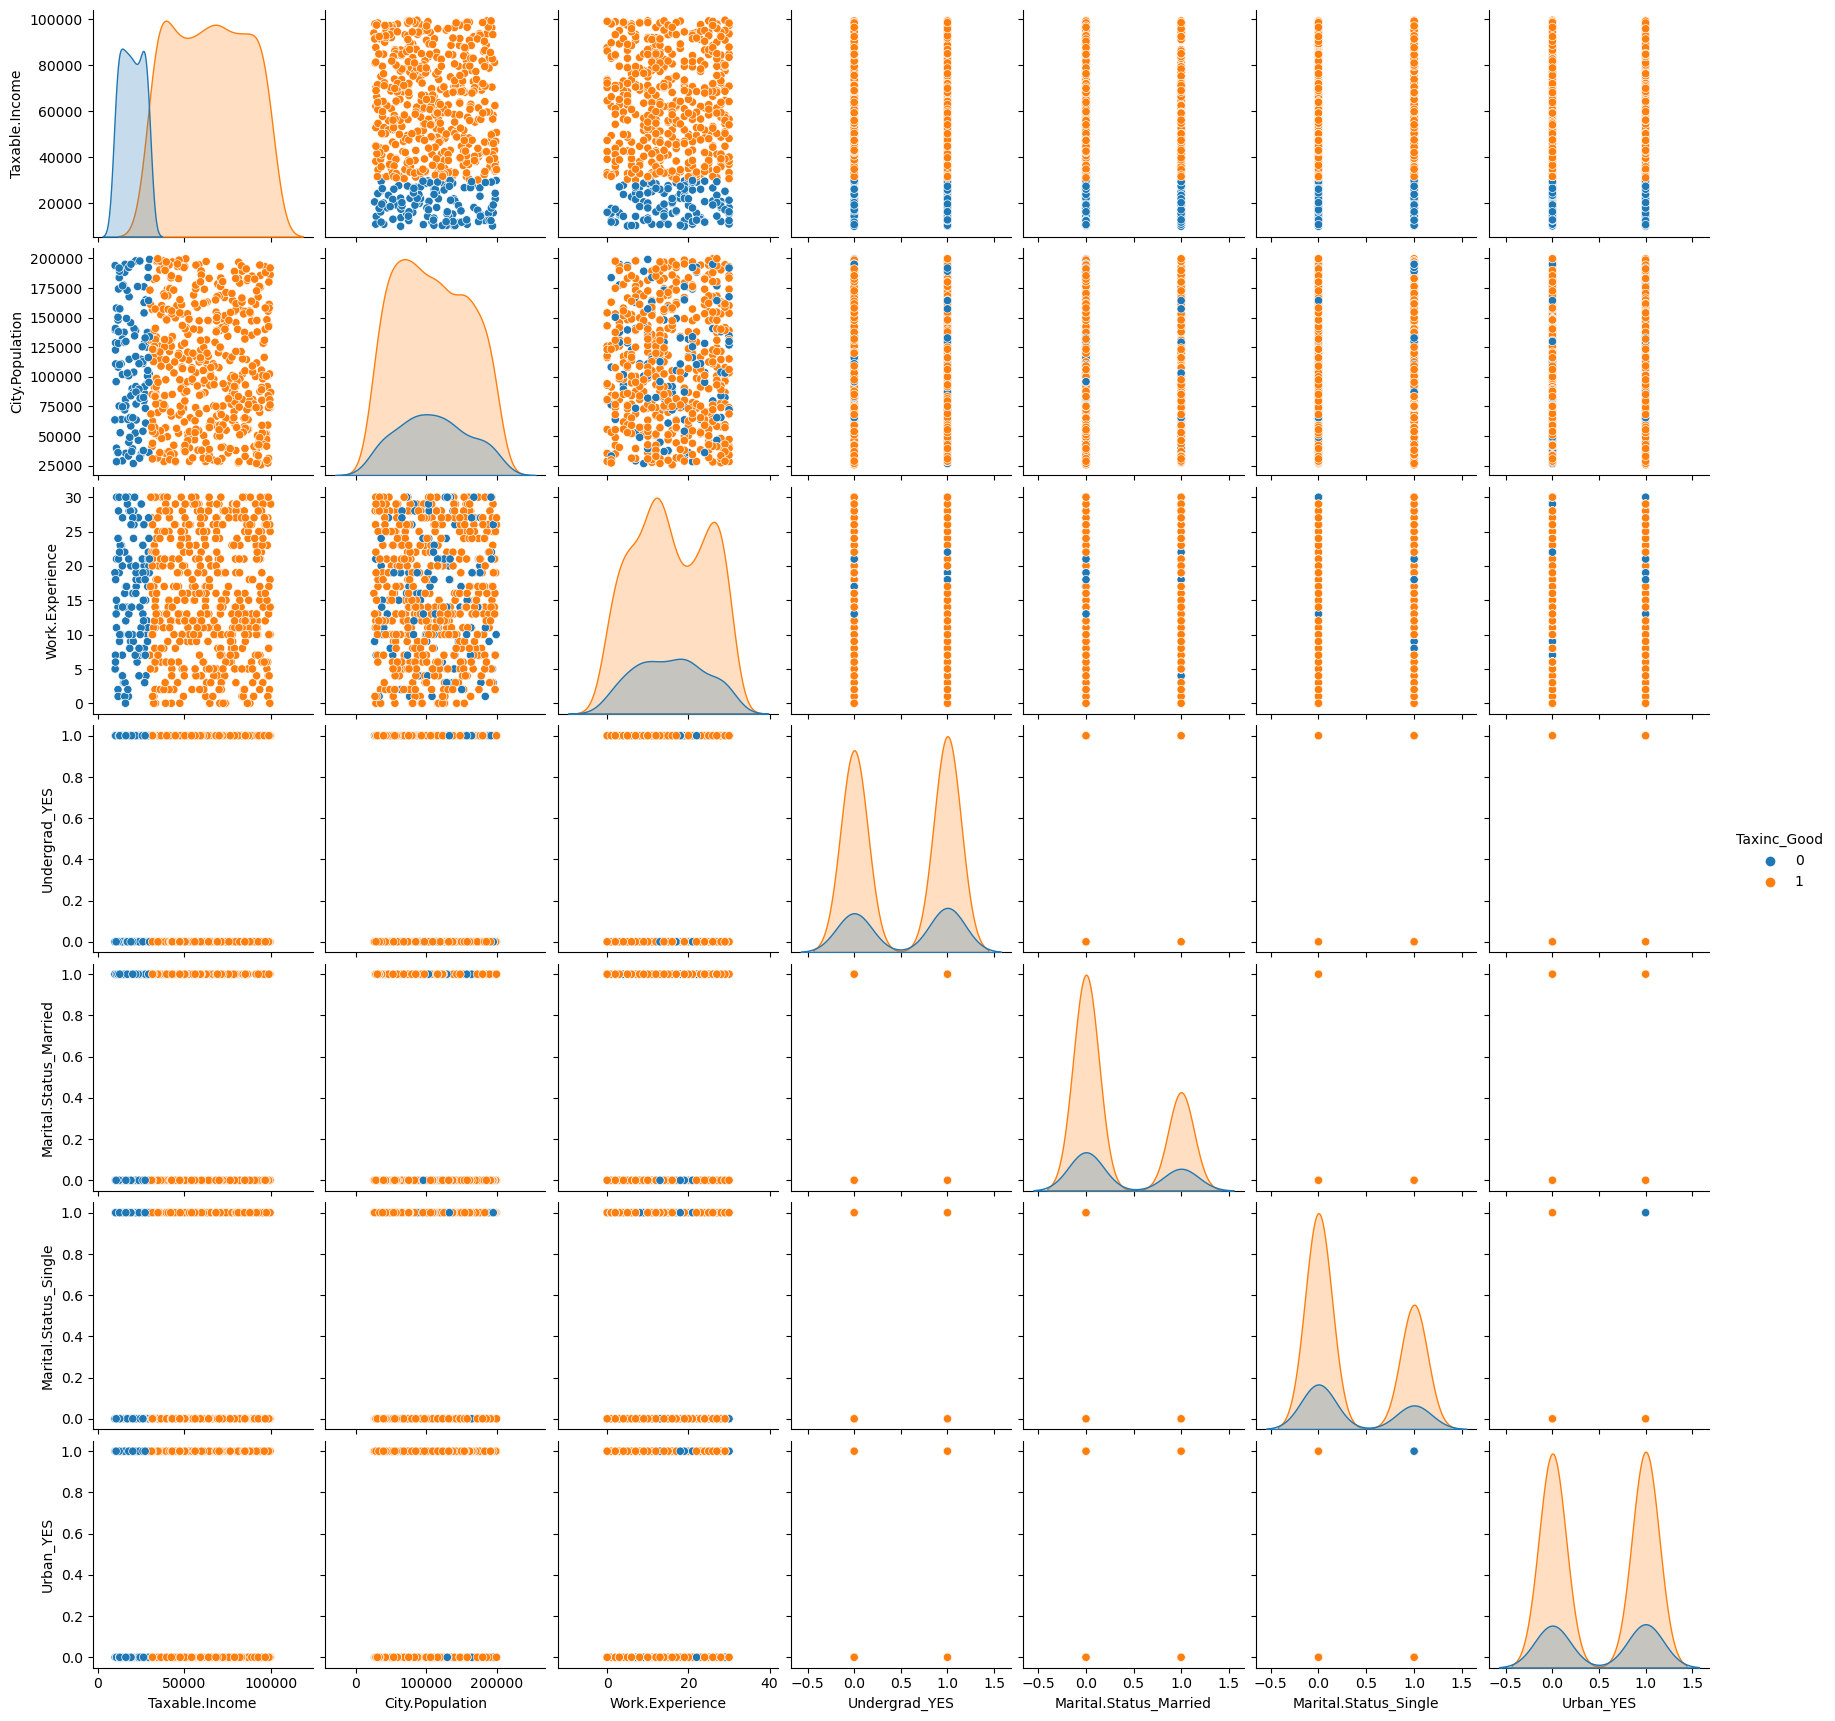

In [17]:
import seaborn as sns
sns.pairplot(data = df, hue='Taxinc_Good')

In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
df_norm = norm_func(df.iloc[:,1:])
df_norm 

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [23]:
# Declaring features & target
X = df_norm.drop(['Taxinc_Good'], axis=1)
y = df_norm['Taxinc_Good']

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
Xtrain, Xtest, ytrian, ytest = train_test_split(X,y, test_size = 0.2, random_state =0)

In [28]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [29]:
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good,income
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0,Good
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0,Good
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0,Good
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0,Good
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0,Good
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0,Good
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0,Good
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0,Good
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0,Good
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0,Good


In [30]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [31]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [32]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass
    


In [33]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [34]:
features

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,1
4,27533,28,0,1,0
5,116382,0,0,0,0
6,80890,8,0,0,0
7,131253,3,1,0,1
8,102481,12,0,0,1
9,155482,4,1,0,0


In [38]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [40]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [42]:
print(model.estimators_)
print(model.classes_)
print(model.n_features_)
print(model.n_classes_)

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=310121273), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1464706736), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=510826576), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=100176327), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1647120881), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1438391634), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1084116210), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1271129249), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       ra

In [43]:
model.n_outputs_

1

In [44]:
model.oob_score_

0.5041666666666667

In [45]:
##Predictions on train data
prediction = model.predict(x_train)

In [46]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [47]:
np.mean(prediction == y_train)
##98.33%

0.9854166666666667

In [51]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[237,   1],
       [  6, 236]], dtype=int64)

In [49]:
##Prediction on test data
pred_test = model.predict(x_test)

In [50]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

### Building Decision Tree Classifier using Entropy Criteria

In [54]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
from sklearn import tree

In [56]:
#PLot the decision tree
tree.plot_tree(model);

In [57]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'Taxinc_Good']

In [58]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [59]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    69
0    51
dtype: int64

In [60]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,28,32
1,23,37


In [61]:
# Accuracy 
np.mean(preds==y_test)

0.5416666666666666

### Building Decision Tree Classifier (CART) using Gini Criteria

In [63]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [64]:

model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.5416666666666666

### Decision Tree Regression Example

In [66]:

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [67]:
array = df.values
X = array[:,0:3]
y = array[:,3]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [69]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
#Find the accuracy
model.score(X_test,y_test)

-0.8931902985074629